In [1]:
%matplotlib inline

In [2]:
from __future__ import division

In [3]:
import numpy as np
import nibabel as nb
from vtk_rw import read_vtk, write_vtk
import matplotlib.pyplot as plt

### load func nifti, highres in sub space, labelling

In [5]:
labels_file= '/scr/ilz3/myelinconnect/all_data_on_simple_surf/labels/old/BP4T_lh_highres2lowres_labels.npy'
rest_file = '/scr/ilz3/myelinconnect/resting/final/BP4T_rest1_1_denoised.nii.gz'
highres_file = '/scr/ilz3/myelinconnect/struct/surf_lh/orig2func/BP4T_lh_mid_groupavgsurf.vtk'

In [6]:
labels =np.load(labels_file)

In [7]:
rest = nb.load(rest_file).get_data()

In [8]:
highres_v, highres_f, highres_d = read_vtk(highres_file)

### for each vertex find the corresponding voxel

In [9]:
print rest.shape
print highres_v.shape

(128, 128, 70, 295)

In [ ]:
# test by creating mask with indexed voxels

In [84]:
res = 1.5
fake = np.zeros((rest.shape[0], rest.shape[1], rest.shape[2]))
idx = np.asarray(np.round(highres_v/res), dtype='int64')
fake[idx[:,0],idx[:,1],idx[:,2]] += 1

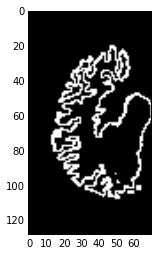

In [99]:
plt.imshow(fake[90,:,:], cmap='gray')

In [101]:
# actually finding the data
idx = np.asarray(np.round(highres_v/1.5), dtype='int64')
rest_highres = rest[idx[:,0],idx[:,1],idx[:,2]]

In [102]:
rest_highres.shape

(737148, 295)

### mean across lables

In [100]:
def sample_simple(highres_data, labels):
    # create new empty lowres data array
    lowres_data = np.empty((int(labels.max()+1), highres_data.shape[1]))
    # find all vertices on highres and mean
    for l in range(int(labels.max())):
        patch = np.where(labels==l)[0]
        patch_data = highres_data[patch]
        patch_mean = np.mean(patch_data, axis=0)
        lowres_data[l] = patch_mean
    
    return lowres_data

In [132]:
rest_lowres = sample_simple(rest_highres, labels)